![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [21]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [22]:
# print the data shape 
print(penguins_df.shape) 
# show data types 
print(penguins_df.dtypes)


(332, 5)
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [23]:
penguins_df=penguins_df.drop_duplicates()
print(penguins_df.isna())

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g    sex
0               False            False              False        False  False
1               False            False              False        False  False
2               False            False              False        False  False
3               False            False              False        False  False
4               False            False              False        False  False
..                ...              ...                ...          ...    ...
327             False            False              False        False  False
328             False            False              False        False  False
329             False            False              False        False  False
330             False            False              False        False  False
331             False            False              False        False  False

[332 rows x 5 columns]


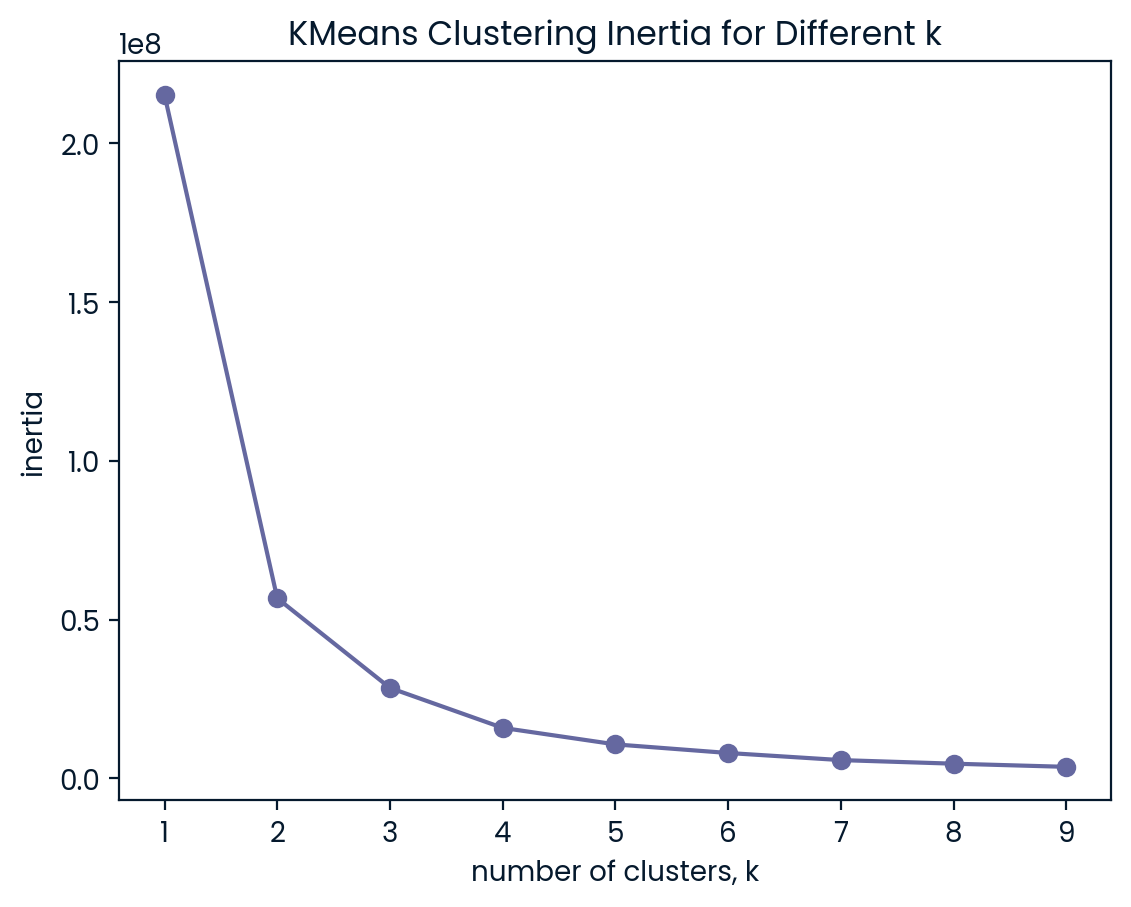

In [24]:
penguins_numeric=penguins_df.drop(columns='sex')
penguins_numeric = penguins_numeric.dropna()
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(penguins_numeric)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('KMeans Clustering Inertia for Different k')
plt.show()

In [25]:
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

penguins_numeric['cluster'] = pipeline.fit_predict(penguins_numeric)
stat_penguins = penguins_numeric.groupby('cluster').mean().reset_index()
print(stat_penguins)


   cluster  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0        0         47.568067        14.996639         217.235294  5092.436975
1        1         38.330233        18.101550         188.651163  3590.697674
2        2         47.735714        18.751190         196.869048  3897.023810
